In [128]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [136]:
df = pd.read_csv('claims_data.csv')
df = df.drop_duplicates()
print(df)

        MONTH SERVICE_CATEGORY     CLAIM_SPECIALTY    PAYER  PAID_AMOUNT
0      201801     AncillaryFFS                 NaN  Payer F         4281
1      201801     AncillaryFFS                 NaN  Payer H         2221
2      201801     AncillaryFFS                 NaN  Payer O         3937
3      201801     AncillaryFFS                 NaN  Payer W          268
4      201801     AncillaryFFS                 ACH  Payer W          151
...       ...              ...                 ...      ...          ...
52147  202007   SpecialistsFFS  RADIATION ONCOLOGY  Payer F          869
52148  202007   SpecialistsFFS    REGISTERED NURSE  Payer H           99
52149  202007   SpecialistsFFS        RHEUMATOLOGY  Payer F          536
52150  202007   SpecialistsFFS    SPECIAL SERVICES  Payer H         1064
52151  202007   SpecialistsFFS             UROLOGY  Payer F         2356

[52152 rows x 5 columns]


In [130]:
df.head()

,MONTH,SERVICE_CATEGORY,CLAIM_SPECIALTY,PAYER,PAID_AMOUNT
0,201801,AncillaryFFS,NaN,Payer F,4281
1,201801,AncillaryFFS,NaN,Payer H,2221
2,201801,AncillaryFFS,NaN,Payer O,3937
3,201801,AncillaryFFS,NaN,Payer W,268
4,201801,AncillaryFFS,ACH,Payer W,151


In [73]:
print(df.describe())

               MONTH   PAID_AMOUNT
count   52141.000000  5.214100e+04
mean   201885.026409  3.723096e+03
std        72.874367  3.450046e+04
min    201801.000000  0.000000e+00
25%    201808.000000  1.990000e+02
50%    201903.000000  5.890000e+02
75%    201911.000000  1.468000e+03
max    202007.000000  2.268611e+06


In [14]:
print(df.isnull())

       MONTH  SERVICE_CATEGORY  CLAIM_SPECIALTY  PAYER  PAID_AMOUNT
0      False             False             True  False        False
1      False             False             True  False        False
2      False             False             True  False        False
3      False             False             True  False        False
4      False             False            False  False        False
...      ...               ...              ...    ...          ...
52147  False             False            False  False        False
52148  False             False            False  False        False
52149  False             False            False  False        False
52150  False             False            False  False        False
52151  False             False            False  False        False

[52152 rows x 5 columns]


In [137]:
df['PAID_AMOUNT'] = df['PAID_AMOUNT'].abs()
print(df['PAID_AMOUNT'])

0        4281
1        2221
2        3937
3         268
4         151
         ... 
52147     869
52148      99
52149     536
52150    1064
52151    2356
Name: PAID_AMOUNT, Length: 52152, dtype: int64


In [138]:
# Функция преобразования
def convert_to_date(month_int):
    date_str = str(month_int)
    year = date_str[:4]
    month = date_str[4:6]
    if month not in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
        return None  # возвращает None для невалидных месяцев
    return pd.to_datetime(f'{year}-{month}-01')

# Применение функции к столбцу
df['DATE'] = df['MONTH'].apply(convert_to_date)

# Удаление строк с невалидными месяцами (где значение даты равно None)
df = df.dropna(subset=['DATE'])
#df.set_index('DATE', inplace=True)
print(df)

        MONTH SERVICE_CATEGORY     CLAIM_SPECIALTY    PAYER  PAID_AMOUNT  \
0      201801     AncillaryFFS                 NaN  Payer F         4281   
1      201801     AncillaryFFS                 NaN  Payer H         2221   
2      201801     AncillaryFFS                 NaN  Payer O         3937   
3      201801     AncillaryFFS                 NaN  Payer W          268   
4      201801     AncillaryFFS                 ACH  Payer W          151   
...       ...              ...                 ...      ...          ...   
52147  202007   SpecialistsFFS  RADIATION ONCOLOGY  Payer F          869   
52148  202007   SpecialistsFFS    REGISTERED NURSE  Payer H           99   
52149  202007   SpecialistsFFS        RHEUMATOLOGY  Payer F          536   
52150  202007   SpecialistsFFS    SPECIAL SERVICES  Payer H         1064   
52151  202007   SpecialistsFFS             UROLOGY  Payer F         2356   

            DATE  
0     2018-01-01  
1     2018-01-01  
2     2018-01-01  
3     2018-

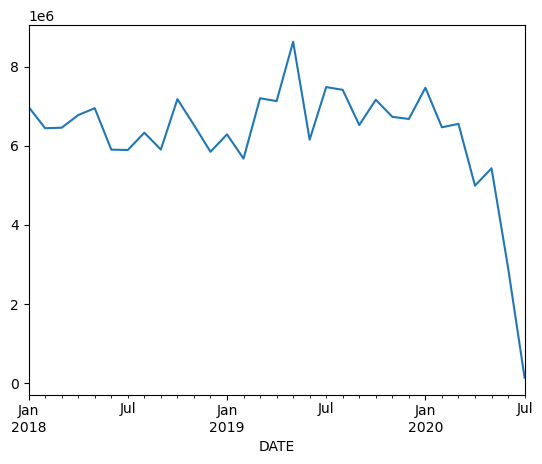

DATE
2018-01-01    6977385
2018-02-01    6441297
2018-03-01    6453429
2018-04-01    6772445
2018-05-01    6947634
2018-06-01    5899749
2018-07-01    5889255
2018-08-01    6326764
2018-09-01    5900700
2018-10-01    7175764
2018-11-01    6522011
2018-12-01    5845298
2019-01-01    6284371
2019-02-01    5672742
2019-03-01    7198576
2019-04-01    7125667
2019-05-01    8628171
2019-06-01    6150782
2019-07-01    7480757
2019-08-01    7410618
2019-09-01    6521595
2019-10-01    7160429
2019-11-01    6728624
2019-12-01    6673909
2020-01-01    7464570
2020-02-01    6463730
2020-03-01    6550948
2020-04-01    4988126
2020-05-01    5426762
2020-06-01    2913437
2020-07-01     130410
Name: PAID_AMOUNT, dtype: int64


In [140]:
monthly_expenses = df.groupby('DATE').sum()['PAID_AMOUNT'].abs()
monthly_expenses.plot()
plt.show()
print(monthly_expenses)

In [141]:
# Обработка пропущенных значений (если они есть)
df.dropna(inplace=True)

# Проверка стационарности ряда

result = adfuller(df['PAID_AMOUNT'])
print('ADF статистика:', result[0])
print('p-значение:', result[1])
print('Критические значения:')
for key, value in result[4].items():
    print(f'  {key}: {value}')

ADF статистика: -30.946289559407372
p-значение: 0.0
Критические значения:
  1%: -3.4304761501511103
  5%: -2.8615957558196237
  10%: -2.5667996769711796


In [142]:
#После подготовки данных мы можем выбрать и обучить модель для прогнозирования. Для этого примера мы будем использовать модель ARIMA.
train_data = monthly_expenses
model = ARIMA(train_data, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)
print(forecast)
print(model_fit.summary())


2020-08-01    407115.519339
2020-09-01    310166.913666
2020-10-01    344134.548878
2020-11-01    332233.395335
2020-12-01    336403.172088
2021-01-01    334942.218063
Freq: MS, Name: predicted_mean, dtype: float64
                               SARIMAX Results                                
Dep. Variable:            PAID_AMOUNT   No. Observations:                   31
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -459.732
Date:                Fri, 03 Nov 2023   AIC                            925.463
Time:                        20:11:52   BIC                            929.667
Sample:                    01-01-2018   HQIC                           926.808
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

C:\Users\Temirlan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Temirlan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Temirlan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                DATE1  FUTURE_AMOUNT
2020-08-01 2020-08-31  407115.519339
2020-09-01 2020-09-30  310166.913666
2020-10-01 2020-10-31  344134.548878
2020-11-01 2020-11-30  332233.395335
2020-12-01 2020-12-31  336403.172088
2021-01-01 2021-01-31  334942.218063
          MONTH SERVICE_CATEGORY                 CLAIM_SPECIALTY     PAYER  \
0      201801.0     AncillaryFFS                             ACH   Payer W   
1      201801.0     AncillaryFFS  Advanced Registered Nurse Prac  Payer UN   
2      201801.0     AncillaryFFS               ADVANCED RN PRACT  Payer CA   
3      201801.0     AncillaryFFS                       AMBULANCE  Payer CA   
4      201801.0     AncillaryFFS                       AMBULANCE  Payer CO   
...         ...              ...                             ...       ...   
51903       NaN              NaN                             NaN       NaN   
51904       NaN              NaN                             NaN       NaN   
51905       NaN              NaN       

C:\Users\Temirlan\AppData\Local\Temp\ipykernel_17692\2155736220.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



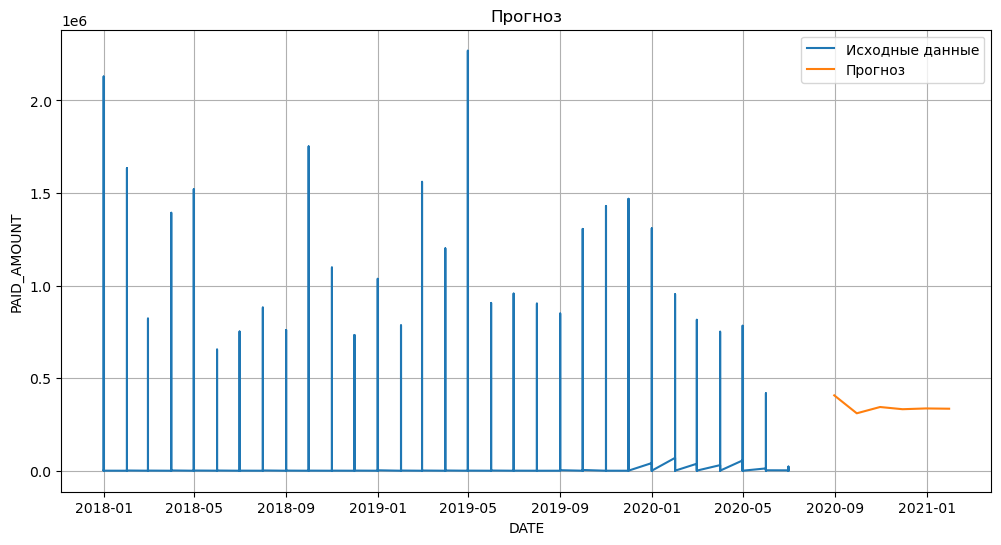

In [145]:
# Прогноз на будущее (следующие 6 месяцев)
forecast_future = model_fit.forecast(steps=6)

# Создаем новый DataFrame для будущих значений
future_dates = pd.date_range(start='2020-08-01', periods=6, freq='MS')
forecast_df = pd.DataFrame({'DATE1': future_dates, 'FUTURE_AMOUNT': forecast_future})
print(forecast_df)
# Присоединяем прогноз к исходному DataFrame
df = df.append(forecast_df, ignore_index=True)
print(df)
# Визуализация исходных данных и прогноза
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'][:-6], df['PAID_AMOUNT'][:-6], label='Исходные данные')
plt.plot(df['DATE1'][-6:], df['FUTURE_AMOUNT'][-6:], label='Прогноз')
plt.title('Прогноз')
plt.xlabel('DATE')
plt.ylabel('PAID_AMOUNT')
plt.legend()
plt.grid(True)
plt.show()

In [147]:
df = df.drop_duplicates()
df.to_csv('claims_data_pred')